In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_text,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_text.shape

(10000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

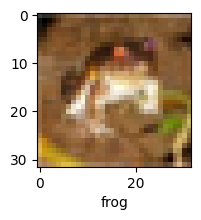

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
X_train = X_train / 255
X_text = X_text / 255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
    ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.3030 - loss: 1.9380
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 80ms/step - accuracy: 0.4182 - loss: 1.6506
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 84ms/step - accuracy: 0.4483 - loss: 1.5591
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 81ms/step - accuracy: 0.4732 - loss: 1.4975
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.4908 - loss: 1.4376


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_text)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.36      0.47      1000
           1       0.68      0.45      0.55      1000
           2       0.25      0.61      0.36      1000
           3       0.38      0.30      0.34      1000
           4       0.55      0.19      0.28      1000
           5       0.57      0.23      0.33      1000
           6       0.42      0.67      0.52      1000
           7       0.74      0.31      0.44      1000
           8       0.65      0.58      0.61      1000
           9       0.40      0.77      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.53      0.45      0.44     10000
weighted avg       0.53      0.45      0.44     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.3650 - loss: 1.7404
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5779 - loss: 1.2028
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 39ms/step - accuracy: 0.6371 - loss: 1.0386
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.6633 - loss: 0.9651
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.6894 - loss: 0.8960
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.7027 - loss: 0.8628
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.7201 - loss: 0.8108
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7343 - loss: 0.7665
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.7434 - loss: 0.7497
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.7501 - loss: 0.7204


In [ ]:
cnn.evaluate(X_text,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6843 - loss: 0.9234


[0.9318069219589233, 0.6826000213623047]

In [ ]:
y_test=y_test.reshape(-1,)

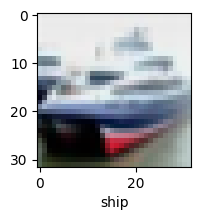

In [ ]:
plot_sample(X_text,y_test,1)

In [ ]:
y_pred = cnn.predict(X_text)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[6.5097618e-03, 4.1594165e-05, 1.5813895e-03, 8.6543155e-01,
        1.6513167e-04, 8.6248696e-02, 2.4126546e-02, 2.0371883e-05,
        1.5858447e-02, 1.6434071e-05],
       [1.8659837e-03, 1.5408577e-02, 1.0215862e-06, 6.5372285e-07,
        1.1018856e-06, 4.2032280e-08, 7.4933757e-09, 1.8772801e-07,
        9.8119432e-01, 1.5280903e-03],
       [3.2724246e-02, 7.4117199e-02, 3.2436006e-02, 2.4105744e-03,
        1.0915187e-02, 9.3025295e-04, 3.2237827e-04, 2.6996969e-04,
        7.7501905e-01, 7.0855163e-02],
       [7.3856872e-01, 1.6082826e-01, 1.0043771e-03, 1.5388366e-03,
        8.1079202e-03, 2.7391226e-05, 3.1647546e-04, 1.3568212e-04,
        8.8548005e-02, 9.2437153e-04],
       [9.1261179e-05, 4.1017059e-04, 4.5043230e-02, 4.6658818e-02,
        6.5463275e-01, 1.1182909e-02, 2.4118254e-01, 1.4797578e-04,
        6.1341625e-04, 3.6967882e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

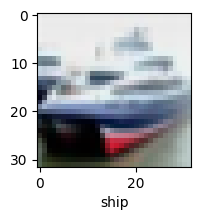

In [24]:
plot_sample(X_text,y_test,1)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.85      0.77      0.80      1000
           2       0.51      0.65      0.57      1000
           3       0.56      0.41      0.47      1000
           4       0.68      0.56      0.61      1000
           5       0.55      0.63      0.59      1000
           6       0.82      0.71      0.76      1000
           7       0.69      0.79      0.73      1000
           8       0.75      0.82      0.78      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

